<a href="https://colab.research.google.com/github/hiyuchang/MATH5470-SML/blob/main/MATH5470_A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ISLR 9.7.3

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
x1 = [3, 2, 4, 1, 2, 4, 4]
x2 = [4, 2, 4, 4, 1, 3, 1]
y_c = ['Red', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue']

In [ ]:
X = [[3, 4], [2, 2], [4, 4], [1, 4], [2, 1], [4, 3], [4, 1]]
y = [0, 0, 0, 0, 1, 1, 1]
from sklearn.svm import SVC 
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)
# plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1])

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

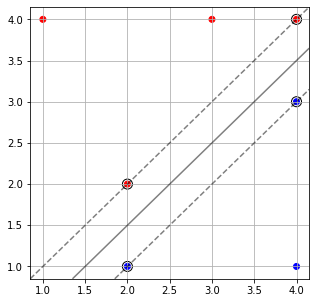

In [ ]:
plt.figure(figsize=(5,5))
ax = plt.gca()
plt.scatter(x1, x2, c=y_c)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
ax.scatter(2, 1, s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.grid()
plt.show()

The equation for hyperplane is -0.5+x1-x2=0

(f) Move seventh observation

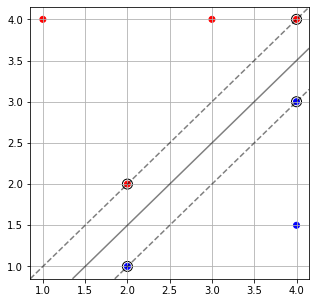

In [ ]:
x1 = [3, 2, 4, 1, 2, 4, 4]
x2 = [4, 2, 4, 4, 1, 3, 1.5]
plt.figure(figsize=(5,5))
ax = plt.gca()
plt.scatter(x1, x2, c=y_c)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
ax.scatter(2, 1, s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.grid()
plt.show()

(g)

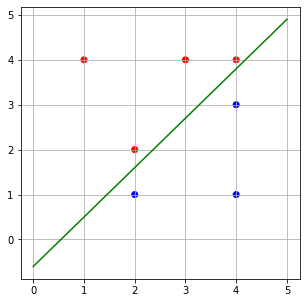

In [ ]:
x1 = [3, 2, 4, 1, 2, 4, 4]
x2 = [4, 2, 4, 4, 1, 3, 1]
plt.figure(figsize=(5,5))
ax = plt.gca()
plt.scatter(x1, x2, c=y_c)

X1 = np.linspace(0, 5, 10)
X2 = 1.1 * X1 - 0.6
ax.plot(X1, X2, color='g')

plt.grid()
plt.show()

(h)

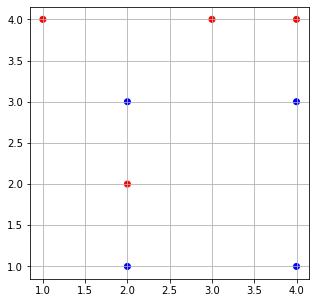

In [ ]:
x1 = [3, 2, 4, 1, 2, 4, 4, 2]
x2 = [4, 2, 4, 4, 1, 3, 1, 3]
y_c = ['Red', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue', 'Blue']
plt.figure(figsize=(5,5))
ax = plt.gca()
plt.scatter(x1, x2, c=y_c)

plt.grid()
plt.show()

# ISLR 9.6.5

In [ ]:
X_train = pd.read_csv('Khan/Khan_xtrain.csv').drop('Unnamed: 0', axis=1)
y_train = pd.read_csv('Khan/Khan_ytrain.csv').drop('Unnamed: 0', axis=1).values.ravel()
X_test = pd.read_csv('Khan/Khan_xtest.csv').drop('Unnamed: 0', axis=1)
y_test = pd.read_csv('Khan/Khan_ytest.csv').drop('Unnamed: 0', axis=1).values.ravel()

In [ ]:
print(X_train.shape)
print(X_test.shape)

(63, 2308)
(20, 2308)


In [ ]:
pd.Series(y_train).value_counts(sort=False)

1     8
2    23
3    12
4    20
dtype: int64

In [ ]:
pd.Series(y_test).value_counts(sort=False)

1    3
2    6
3    6
4    5
dtype: int64

In [ ]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, svc.predict(X_train))
cm_df = pd.DataFrame(cm.T, index=svc.classes_, columns=svc.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)

True       1   2   3   4
Predicted               
1          8   0   0   0
2          0  23   0   0
3          0   0  12   0
4          0   0   0  20


In [ ]:
cm = confusion_matrix(y_test, svc.predict(X_test))
cm_df = pd.DataFrame(cm.T, index=svc.classes_, columns=svc.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)

True       1  2  3  4
Predicted            
1          3  0  0  0
2          0  6  2  0
3          0  0  4  0
4          0  0  0  5


# 9.7.5
Ref: https://nbviewer.jupyter.org/github/a-martyn/ISL-python/blob/master/Notebooks/ch9_support_vector_machines_applied.ipynb

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import preprocessing
from sklearn import svm
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression

In [11]:
# Generate noisy moon shaped data
n_samples = 100
noise = 0.2
X_train, y_train = make_moons(n_samples=n_samples, noise=noise, random_state=1)
X_test, y_test = make_moons(n_samples=n_samples, noise=noise, random_state=2)

# Scale data
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

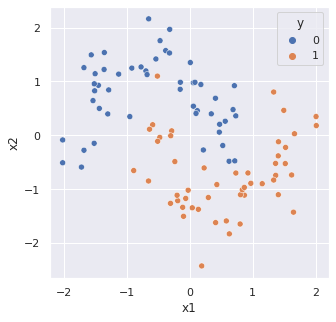

In [12]:
df = pd.concat([pd.DataFrame(data=X_train, columns=['x1', 'x2']), pd.Series(y_train, name='y')], axis=1)
plt.figure(figsize=(5, 5))
sns.scatterplot(x='x1', y='x2', hue='y', data=df);

In [15]:
def plot_clf(model, df, grid_range, show_contours=False, show_support_vectors=False):
    # Decision boundary plot
    
    # Get grid of values in given range
    x1 = grid_range
    x2 = grid_range
    xx1, xx2 = np.meshgrid(x1, x2, sparse=False)
    Xgrid = np.stack((xx1.flatten(), xx2.flatten())).T
    
    # Get decision boundary values for plot grid
    decision_boundary = model.predict(Xgrid)
    decision_boundary_grid = decision_boundary.reshape(len(x2), len(x1))
    
    # Get decision function values for plot grid
    decision_function = model.decision_function(Xgrid)
    decision_function_grid = decision_function.reshape(len(x2), len(x1))
    
    fig = plt.figure(figsize=(5, 5))
    if show_contours:
        plt.contour(x1, x2, decision_function_grid);
    plt.contour(x1, x2, decision_boundary_grid);
    
    sns.scatterplot(x='x1', y='x2', hue='y', data=df)
    if show_support_vectors:
        sns.scatterplot(x=model.support_vectors_[:,0], y=model.support_vectors_[:,1], color='blue', marker='+', s=500)
    plt.show();

Linear kernel

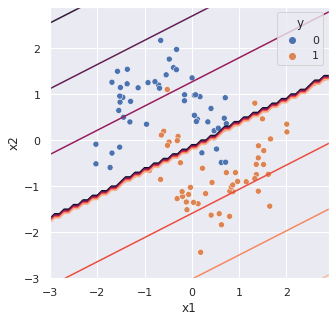

Training accuracy: 0.87
Test accuracy    : 0.85


In [16]:
model = svm.SVC(kernel='linear', gamma=1, C=1, random_state=0, probability=True).fit(X_train, y_train)

plot_clf(model, df, np.arange(-3, 3, .1), show_contours=True)

print(f'Training accuracy: {model.score(X_train, y_train)}')
print(f'Test accuracy    : {model.score(X_test, y_test)}')

Polynomial kernel

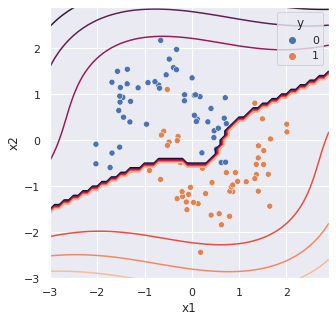

Training accuracy: 0.9
Test accuracy    : 0.88


In [17]:
model = svm.SVC(kernel='poly', degree=3, gamma=1, C=1, random_state=0, probability=True).fit(X_train, y_train)

plot_clf(model, df, np.arange(-3, 3, .1), show_contours=True)

print(f'Training accuracy: {model.score(X_train, y_train)}')
print(f'Test accuracy    : {model.score(X_test, y_test)}')

Radial kernel

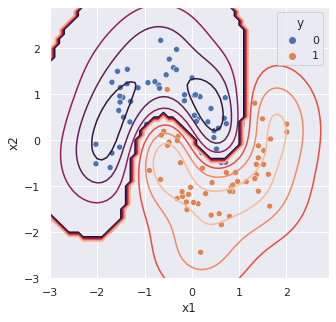

Training accuracy: 0.96
Test accuracy    : 0.95


In [18]:
model = svm.SVC(kernel='rbf', gamma=1, C=1, random_state=0, probability=True).fit(X_train, y_train)

plot_clf(model, df, np.arange(-3, 3, .1), show_contours=True)

print(f'Training accuracy: {model.score(X_train, y_train)}')
print(f'Test accuracy    : {model.score(X_test, y_test)}')